In [61]:
from hossam import load_data, visualize_silhouette
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

#클러스터링 관련 참조
from scipy.spatial import ConvexHull
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage


my_dpi=200

In [62]:
origin = load_data("game_usage")
origin.head()

게임 이용시간(time spent)과 레벨(game level)에 대한 가상 데이터


,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109


In [63]:
scaler = StandardScaler()
sdf = DataFrame(scaler.fit_transform(origin), columns=origin.columns)
sdf

,time spent,game level
0,-0.250733,1.474805
1,0.326494,0.606546
2,-0.611500,0.795456
3,0.470801,1.674613
4,-1.405187,-1.558652
5,-0.395040,0.766393
6,-1.260881,-0.065537
7,-0.575423,-0.465154
8,0.146111,-1.137237
9,-0.827960,-0.247181


In [64]:
estimator = AgglomerativeClustering(
    n_clusters=None,
    distance_threshold=5,
    compute_distances=True,
)

estimator.fit(sdf)

result_df = sdf.copy()
result_df["cluster"] = estimator.labels_

result_df.head(10)

,time spent,game level,cluster
0,-0.250733,1.474805,0
1,0.326494,0.606546,0
2,-0.611500,0.795456,2
3,0.470801,1.674613,0
4,-1.405187,-1.558652,4
5,-0.395040,0.766393,2
6,-1.260881,-0.065537,1
7,-0.575423,-0.465154,1
8,0.146111,-1.137237,1
9,-0.827960,-0.247181,1


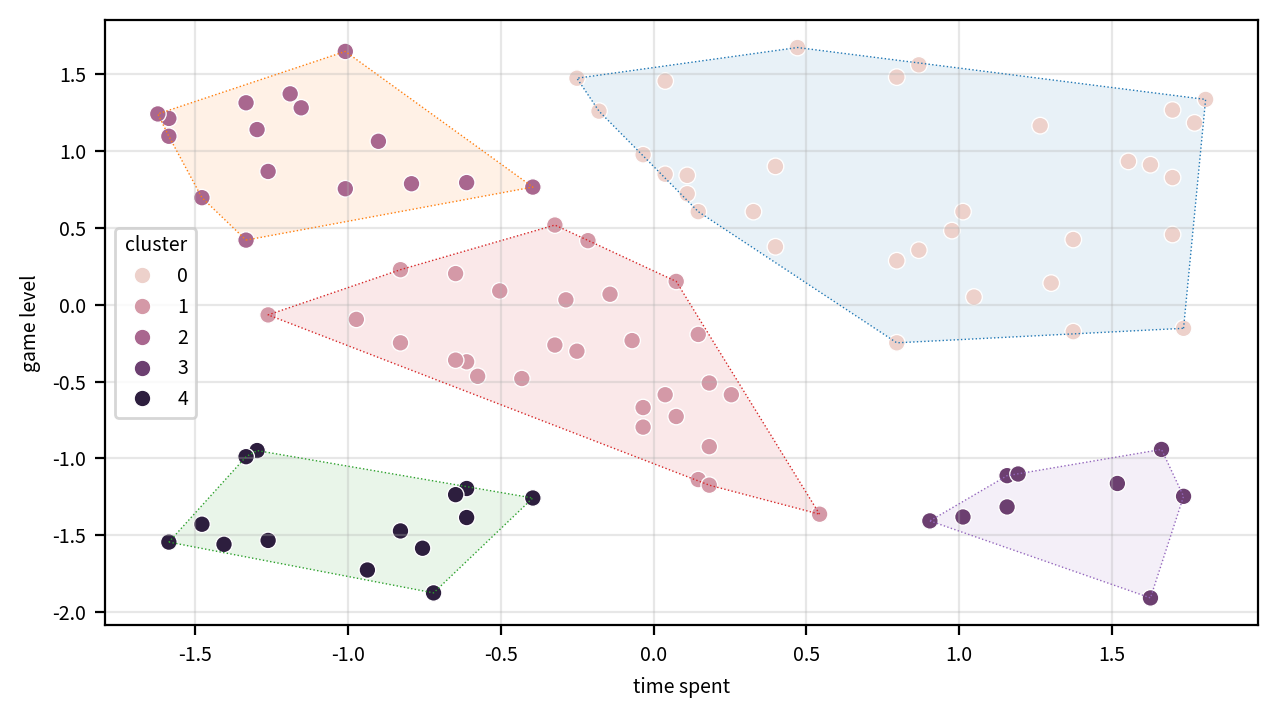

In [65]:
vdf = result_df.copy()
hue_field = "cluster"
x_field = "time spent"
y_field = "game level"

figsize = (1280/ my_dpi, 720/my_dpi)
fig, ax = plt.subplots(1, 1, figsize = figsize, dpi=my_dpi)

for c in vdf[hue_field].unique():
    df_c=vdf.loc[vdf[hue_field] == c, [x_field, y_field]]

    try:
        hull = ConvexHull(df_c)
        points = np.append(hull.vertices, hull.vertices[0])
        ax.plot(
            df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth=0.5, linestyle=":"
        )
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)

    except:
        pass

sb.scatterplot(data=vdf, x=x_field, y=y_field, hue=hue_field)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

In [66]:
estimator.n_clusters_

np.int64(5)

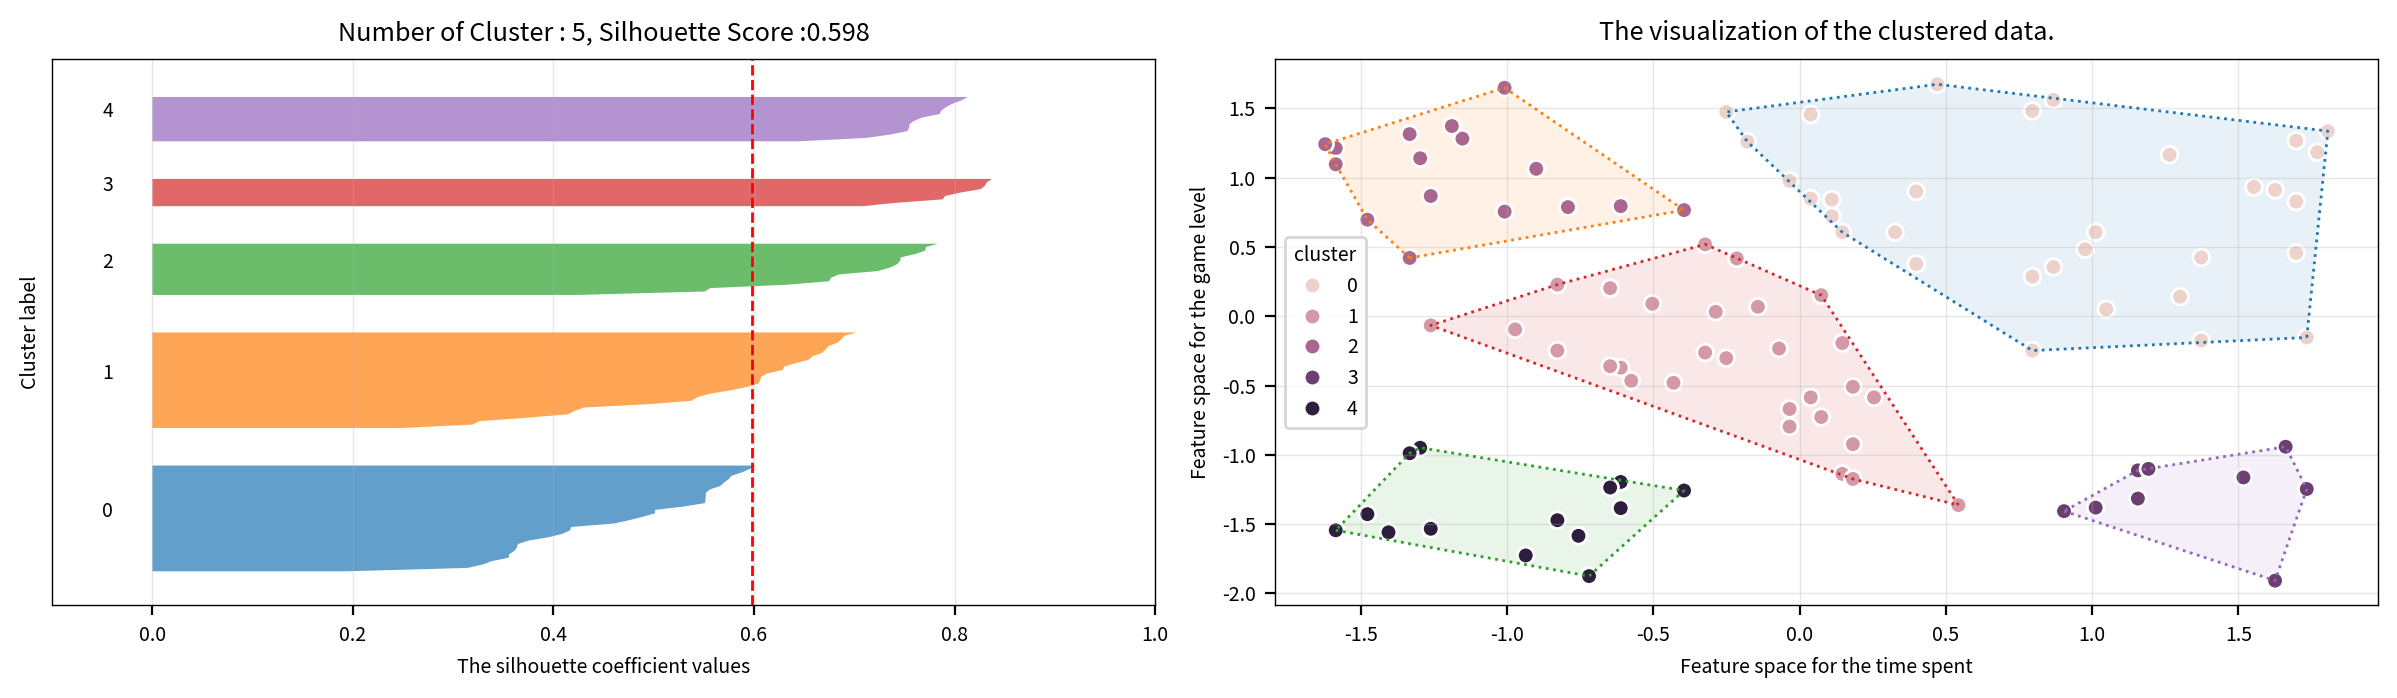

In [67]:
visualize_silhouette(estimator=estimator, data=result_df)

In [71]:
import numpy as np


def dandrogram_source(estimator):
    counts = np.zeros(estimator.children_.shape[0])
    n_samples = len(estimator.labels_)

    for i, merge in enumerate(estimator.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [estimator.children_, estimator.distances_, counts]
    ).astype(float)

    return linkage_matrix


data = dandrogram_source(estimator)
data

array([[3.60000000e+01, 8.70000000e+01, 3.76869846e-02, 2.00000000e+00],
       [5.10000000e+01, 9.80000000e+01, 3.76869846e-02, 2.00000000e+00],
       [2.50000000e+01, 4.20000000e+01, 4.63269855e-02, 2.00000000e+00],
       [8.00000000e+00, 3.70000000e+01, 5.11987456e-02, 2.00000000e+00],
       [1.20000000e+01, 1.70000000e+01, 5.38374037e-02, 2.00000000e+00],
       [5.30000000e+01, 7.20000000e+01, 5.38374037e-02, 2.00000000e+00],
       [6.50000000e+01, 9.00000000e+01, 7.25183053e-02, 2.00000000e+00],
       [1.60000000e+01, 4.10000000e+01, 7.53739693e-02, 2.00000000e+00],
       [4.70000000e+01, 6.80000000e+01, 8.24806098e-02, 2.00000000e+00],
       [1.80000000e+01, 9.70000000e+01, 9.77249893e-02, 2.00000000e+00],
       [2.00000000e+01, 8.10000000e+01, 9.98525451e-02, 2.00000000e+00],
       [3.20000000e+01, 5.00000000e+01, 1.05006463e-01, 2.00000000e+00],
       [1.40000000e+01, 9.40000000e+01, 1.07674807e-01, 2.00000000e+00],
       [2.80000000e+01, 9.20000000e+01, 1.10398218e

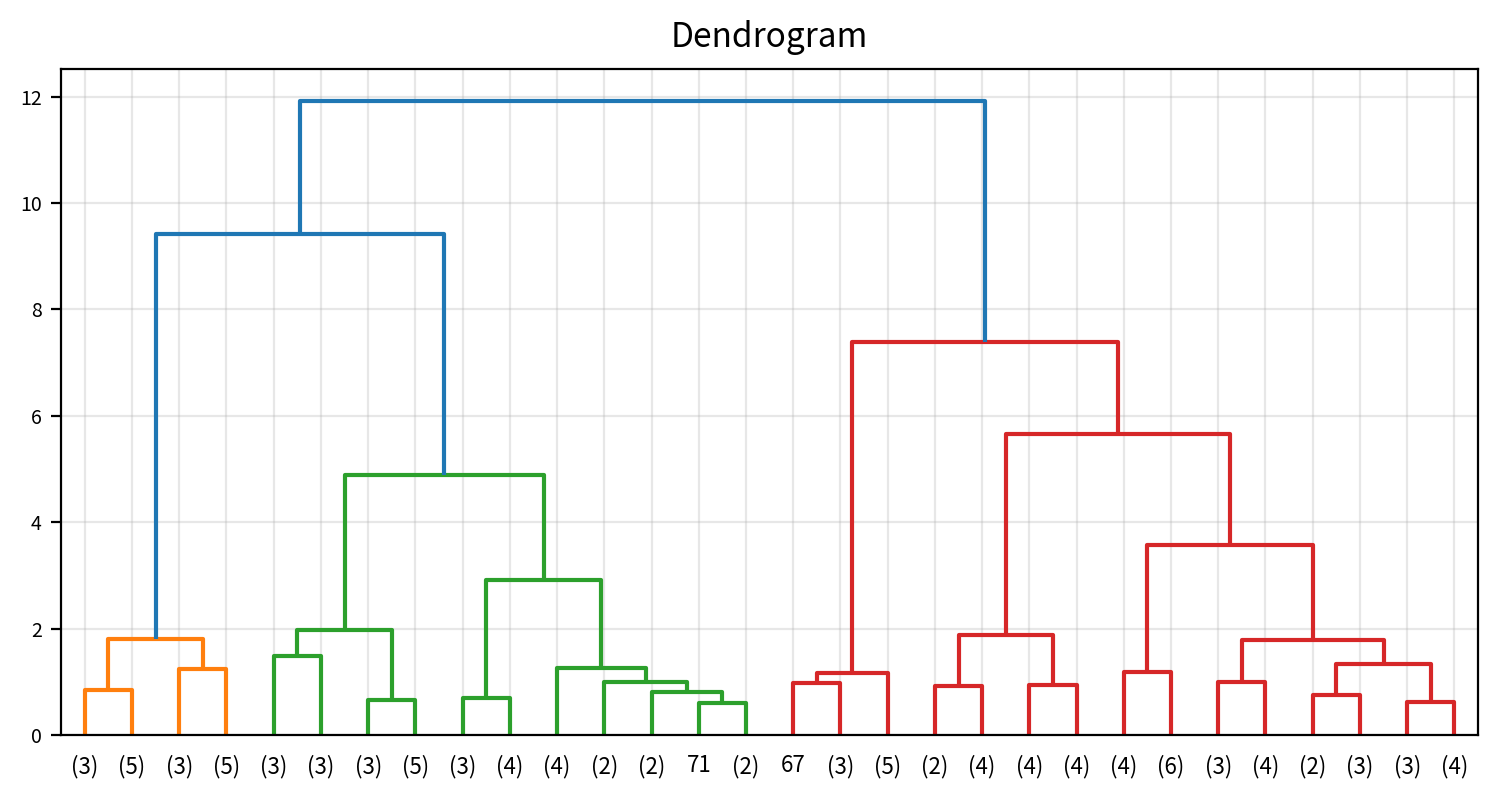

In [ ]:
figsize = (1500/ my_dpi, 800/my_dpi)
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)

dendrogram(
    data,
    ax=ax,
    p=30,
    truncate_mode="lastp",
    leaf_rotation=0,
    leaf_font_size=8,
    count_sort="ascending",
)
ax.set_title("Dendrogram", fontsize=12, pad=8)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

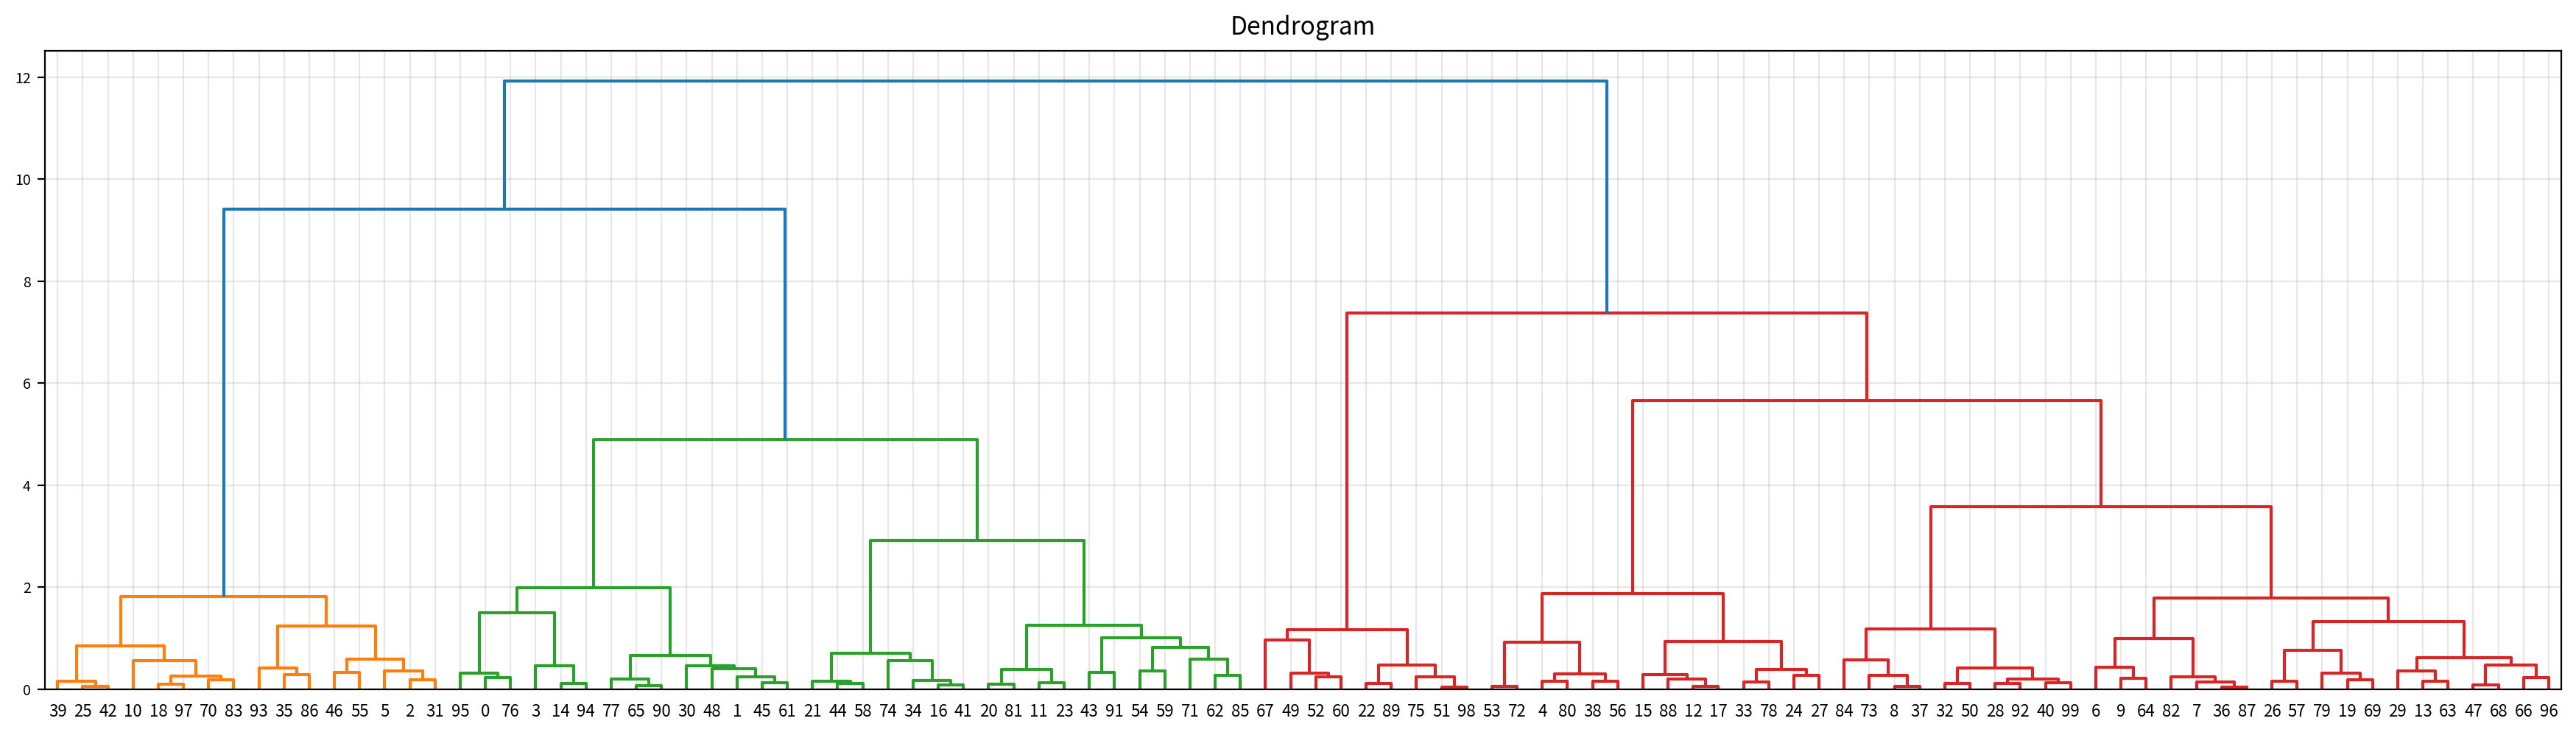

In [70]:
figsize = (3500/ my_dpi, 1000/my_dpi)
fig, ax = plt.subplots(1,1,figsize=figsize, dpi=my_dpi)

dendrogram(
    data,
    ax=ax, 
    p=100,
    truncate_mode="lastp",
    leaf_rotation=0,
    leaf_font_size=8,
    count_sort="ascending",
)

ax.set_title("Dendrogram", fontsize=12, pad=8)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()
